# No.2 Softmax classifier for MNIST

Import modules.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Prepare the MNIST dataset.

In [2]:
mnist = input_data.read_data_sets("./tmp/", one_hot=True)

Extracting ./tmp/train-images-idx3-ubyte.gz
Extracting ./tmp/train-labels-idx1-ubyte.gz
Extracting ./tmp/t10k-images-idx3-ubyte.gz
Extracting ./tmp/t10k-labels-idx1-ubyte.gz


In [3]:
images, labels = mnist.train.next_batch(10)

In [4]:
images[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [5]:
labels[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

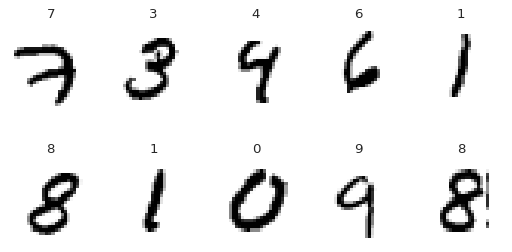

In [6]:
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels)):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")

Define a relationship to calculate probabilities for numbers 0,1,...,9.

In [7]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))
f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

Define a loss function and a training algorithm 'train_step'.

In [8]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)

Define an accuracy.

In [9]:
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Prepare a session and initialize Variables.

In [10]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Iterate the optimization using the stochastic gradient decent for 2,000 times. Use 100 data from the training set for each iteration.

It finally achieves 92% accuracy for the test set.

In [11]:
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, Loss: %f, Accuracy: %f'
               % (i, loss_val, acc_val))

Step: 100, Loss: 7746.856445, Accuracy: 0.848900
Step: 200, Loss: 5439.896484, Accuracy: 0.879500
Step: 300, Loss: 4557.967773, Accuracy: 0.890400
Step: 400, Loss: 4133.610840, Accuracy: 0.896100
Step: 500, Loss: 3836.895996, Accuracy: 0.902500
Step: 600, Loss: 3640.101807, Accuracy: 0.904200
Step: 700, Loss: 3490.937988, Accuracy: 0.908300
Step: 800, Loss: 3374.456055, Accuracy: 0.910500
Step: 900, Loss: 3291.188965, Accuracy: 0.911100
Step: 1000, Loss: 3207.306641, Accuracy: 0.914400
Step: 1100, Loss: 3142.036133, Accuracy: 0.913500
Step: 1200, Loss: 3085.716553, Accuracy: 0.915500
Step: 1300, Loss: 3075.302246, Accuracy: 0.915300
Step: 1400, Loss: 3016.466064, Accuracy: 0.917700
Step: 1500, Loss: 2993.702148, Accuracy: 0.916200
Step: 1600, Loss: 2948.174316, Accuracy: 0.918700
Step: 1700, Loss: 2921.126465, Accuracy: 0.918400
Step: 1800, Loss: 2929.729492, Accuracy: 0.918900
Step: 1900, Loss: 2879.869873, Accuracy: 0.919800
Step: 2000, Loss: 2901.451660, Accuracy: 0.919200


Show prediction examples for the test test. Each row shows 3 correct and 3 incorrect predictions.



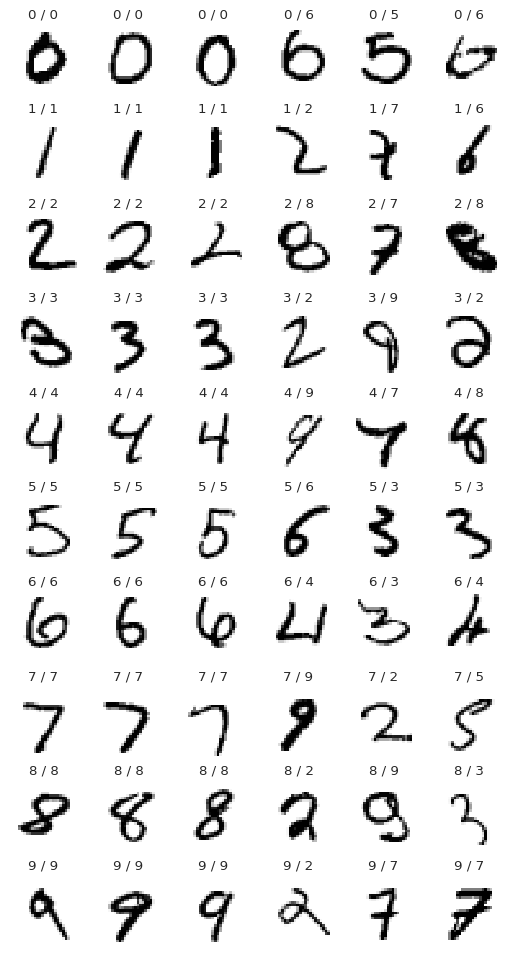

In [12]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break